# Exploring Dandiset 001275: Mental Navigation Primate PPC Neupane_Fiete_Jazayeri

**Important:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified.
Use caution when interpreting the code or results.

## Overview of the Dandiset

This Dandiset contains neurophysiology data collected from two primates during a mental navigation task.

[Neurosift Link](https://neurosift.app/dandiset/001275)

## What This Notebook Covers

This notebook demonstrates how to load and visualize data from Dandiset 001275 using the DANDI API and PyNWB.
It covers the following:

*   Loading the Dandiset and its assets
*   Loading and visualizing eye position data
*   Loading and visualizing spike counts for each unit
*   Loading and visualizing trial data

## Required Packages

The following packages are required to run this notebook:

*   dandi
*   pynwb
*   h5py
*   remfile
*   matplotlib
*   numpy
*   seaborn

Make sure these are already installed on your system. Do not include pip install commands.


In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001275")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 20 assets in the dataset

First 5 assets:
- sub-mahler/sub-mahler_ses-03122021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03172021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03152021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03182021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03192021_behavior+ecephys.nwb


## Loading an NWB File and Displaying Metadata

This section demonstrates how to load one of the NWB files in the Dandiset and display some metadata.
The file we will load is `sub-amadeus/sub-amadeus_ses-01042020_behavior+ecephys.nwb`.
The URL for the asset is obtained as follows: `https://api.dandiarchive.org/api/assets/b0bbeb4c-5e0d-4050-a993-798173797d94/download/`.

In [2]:
import pynwb
import h5py
import remfile

# Load
url = "https://api.dandiarchive.org/api/assets/b0bbeb4c-5e0d-4050-a993-798173797d94/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

nwb

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


root pynwb.file.NWBFile at 0x140339516738384
Fields:
  devices: {
    vprobe0 <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    vprobe0 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experimenter: ['Neupane, Sujaya']
  file_create_date: [datetime.datetime(2025, 2, 10, 15, 59, 32, 811962, tzinfo=tzoffset(None, -18000))]
  identifier: 15de6847-1f57-4247-847b-af4b179d1b7c
  institution: MIT
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  lab: Jazayeri, Fiete
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    ecephys <class 'pynwb.base.ProcessingModule'>
  }
  session_description: Data from macaque performing mental navigation task. Subject is presented with a start and a target landmark, sampled from a linear map of 6 landmarks on a screen. After a delay, the subject is then cued with a go signal to navigate from start to target landmark with a joystick. Subject should respond by deflecting the joystick in the right direction and holding it until the subject thinks it has arrived at the target landmark. The visual drift or intervening landmarks are all occluded from view making the task a purely mental navigation.
  session_id: 01042020
  session_start_time: 2020-01-04 00:00:00-05:00
  subject: subject pynwb.file.Subject at 0x140339104083920
Fields:
  age: P10Y
  age__reference: birth
  sex: M
  species: Macaca mulatta
  subject_id: amadeus

  timestamps_reference_time: 2020-01-04 00:00:00-05:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>

## Loading and Visualizing Eye Position Data

This section demonstrates how to load and visualize eye position data from the NWB file.

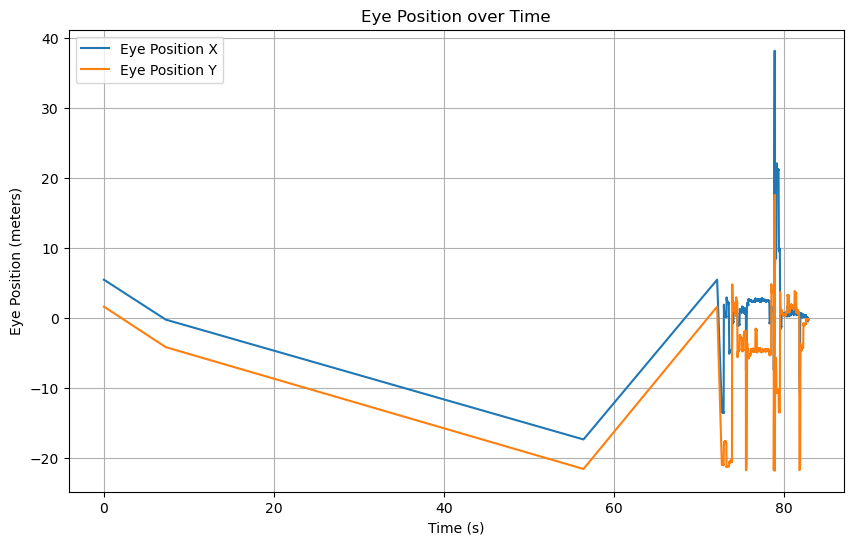

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Extract eye position data
eye_position = nwb.processing["behavior"].data_interfaces["eye_position"]
eye_position_x = eye_position.data[:, 0]
eye_position_y = eye_position.data[:, 1]
timestamps = eye_position.timestamps[:]

# Take the first 10000 samples to prevent the notebook from timing out
num_samples = 10000
eye_position_x = eye_position_x[:num_samples]
eye_position_y = eye_position_y[:num_samples]
timestamps = timestamps[:num_samples]

# Subtract the minimum timestamp from all timestamps
timestamps = timestamps - np.min(timestamps)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(timestamps, eye_position_x, label='Eye Position X')
plt.plot(timestamps, eye_position_y, label='Eye Position Y')
plt.xlabel('Time (s)')
plt.ylabel('Eye Position (meters)')
plt.title('Eye Position over Time')
plt.legend()
plt.grid(True)
plt.show()

The plot shows the x and y eye positions over time. Initially, both x and y positions decrease linearly. Around 59 seconds, they begin a linear increase. After approximately 73 seconds, the data demonstrates significant and erratic fluctuations. There is a large peak around 80 seconds.

## Loading and Visualizing Spike Counts for Each Unit

This section demonstrates how to load and visualize spike counts for each unit from the NWB file.

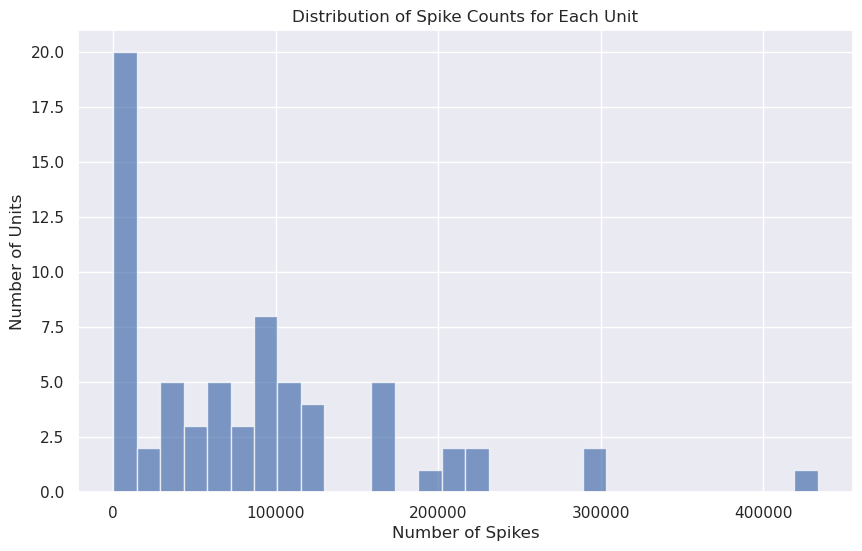

In [4]:
import seaborn as sns
sns.set_theme()

# Extract units data
units = nwb.processing["ecephys"].data_interfaces["units"].to_dataframe()
spike_counts = units['n_spikes']

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(spike_counts, bins=30, alpha=0.7)
plt.xlabel('Number of Spikes')
plt.ylabel('Number of Units')
plt.title('Distribution of Spike Counts for Each Unit')
plt.grid(True)
plt.show()

The distribution of spike counts is heavily skewed, with most units having a low number of spikes.

## Loading and Visualizing Trial Data

This section demonstrates how to load and visualize trial data from the NWB file.

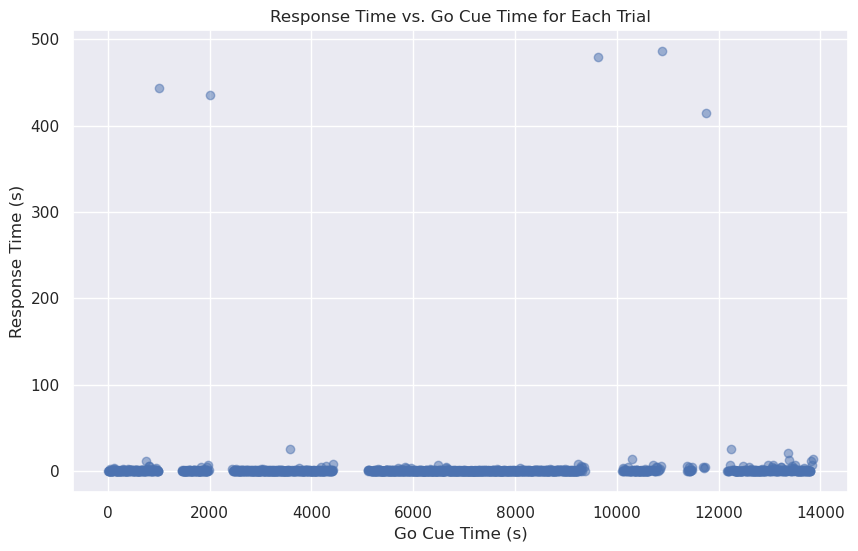

In [5]:
# Extract trials data
trials = nwb.intervals["trials"].to_dataframe()
rt = trials['rt']
delay = trials['gocuettl']

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(delay, rt, alpha=0.5)
plt.xlabel('Go Cue Time (s)')
plt.ylabel('Response Time (s)')
plt.title('Response Time vs. Go Cue Time for Each Trial')
plt.grid(True)
plt.show()

The plot shows response time versus go cue time. There is no clear relationship between response time and go cue time. There are several apparent outliers with high response times.

## Summary and Future Directions

This notebook demonstrated how to load and visualize data from Dandiset 001275.
Possible future directions for analysis include:

*   Exploring the relationship between eye position and trial type
*   Investigating the properties of the outlier units with high spike counts
*   Performing more advanced analysis of the neural activity during the mental navigation task